In [7]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib
import cv2
import csv
import png
import pandas as pd

In [8]:
vid_path = '../../data/commaai/othertry/comma2k19/Chunk_1/B5ZSHM~J/12/video.hevc'

In [9]:
vid = imageio.get_reader(vid_path,  'ffmpeg')
frames = np.array([im for im in vid.iter_data()], dtype=np.uint8)
vid.close()

In [10]:
232/2

116.0

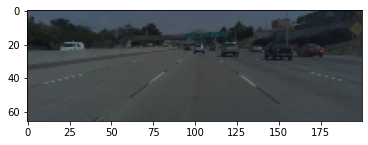

In [11]:
new_width = 232
new_height = 174
test = cv2.resize(frames[100], dsize = (new_width, new_height), interpolation = cv2.INTER_LINEAR)
plt.imshow(test[(87 - 33):(87 + 33),(116 - 100):(116 + 100),:])

In [6]:
matplotlib.pyplot.imsave('name.png', test)

In [ ]:
with open('angles.csv', 'a') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['hello', 'hello2'])
        writer.writerow(['hello3', 'hello4'])
        

In [ ]:
with open('angles.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

In [ ]:
row

In [ ]:
def read_vid_angles(vid_path, value_path, t_path, density):
    
    # read video
    vid = imageio.get_reader(vid_path,  'ffmpeg')
    frames = np.array([im for im in vid.iter_data()], dtype=np.uint8)
    vid.close()
    
    # read steering angles
    angle = np.load(value_path)
    
    # read device boot time
    t = np.load(t_path)
    
    # dataframe of angles and timestamps
    angles = pd.DataFrame({'t' : t, 'angle': angle})
    
    # get timestamps of frames
    timestamps_frames = np.zeros(frames.shape[0])
    start_stamp = t[0] 
    timestamps_frames[0] = start_stamp
    for i in range(1, len(timestamps_frames)):
        timestamps_frames[i] = timestamps_frames[i - 1] + 0.05
    
    # get angles per frame
    target_angles = [angles.loc[find_closest_element(timestamps_frames[i], np.array(angles['t'])),'angle'] for i in range(0, len(timestamps_frames))]
    
    # downsamples images
    new_height = 174
    new_width = 131
    rez_frames = []
    for i in range(0, frames.shape[0]):
        frames_i = cv2.resize(frames[i, :, :, :], dsize = (new_height,new_width), interpolation = cv2.INTER_LINEAR)
        rez_frames.append(frames_i)
    frames_i = np.array(frames_i)
    # return every 5th frame
    print(len(rez_frames))
    trans_label = [norm.ppf(Fy(target_angles[i], density)) for i in range(0, len(target_angles))]
    
    return(rez_frames[::5], target_angles[::5], trans_label)